# **Laporan Proyek Machine Learning**

Proyek Predictive Analysis: **Gold Price Prediction Dataset**
- Nama:**ERIKA BUDIARTI**
- Email: erika.analytic@gmail.com
- Id Dicoding:erika_budiarti

In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Melihat sekilas dataframe
gold_data = pd.read_csv('/content/gld_price_data.csv')
gold_data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [3]:
# Menampilkan jumlah baris dan kolom pada dataframe
gold_data.shape

(2290, 6)

In [4]:
# Menampilkan informasi singkat dari dataframe
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [5]:
# Menampilkan statistik dataframe
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [6]:
correlation = gold_data.corr()
correlation

<ipython-input-6-6a7ebe6011c6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

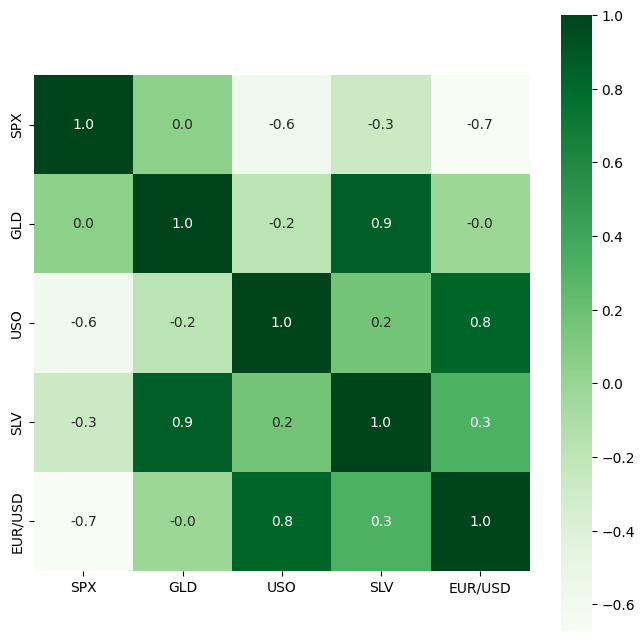

In [7]:
# Menampilkan korelasi antar variable dalam heatmap
import matplotlib.pyplot as plt
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':10}, cmap='Greens')

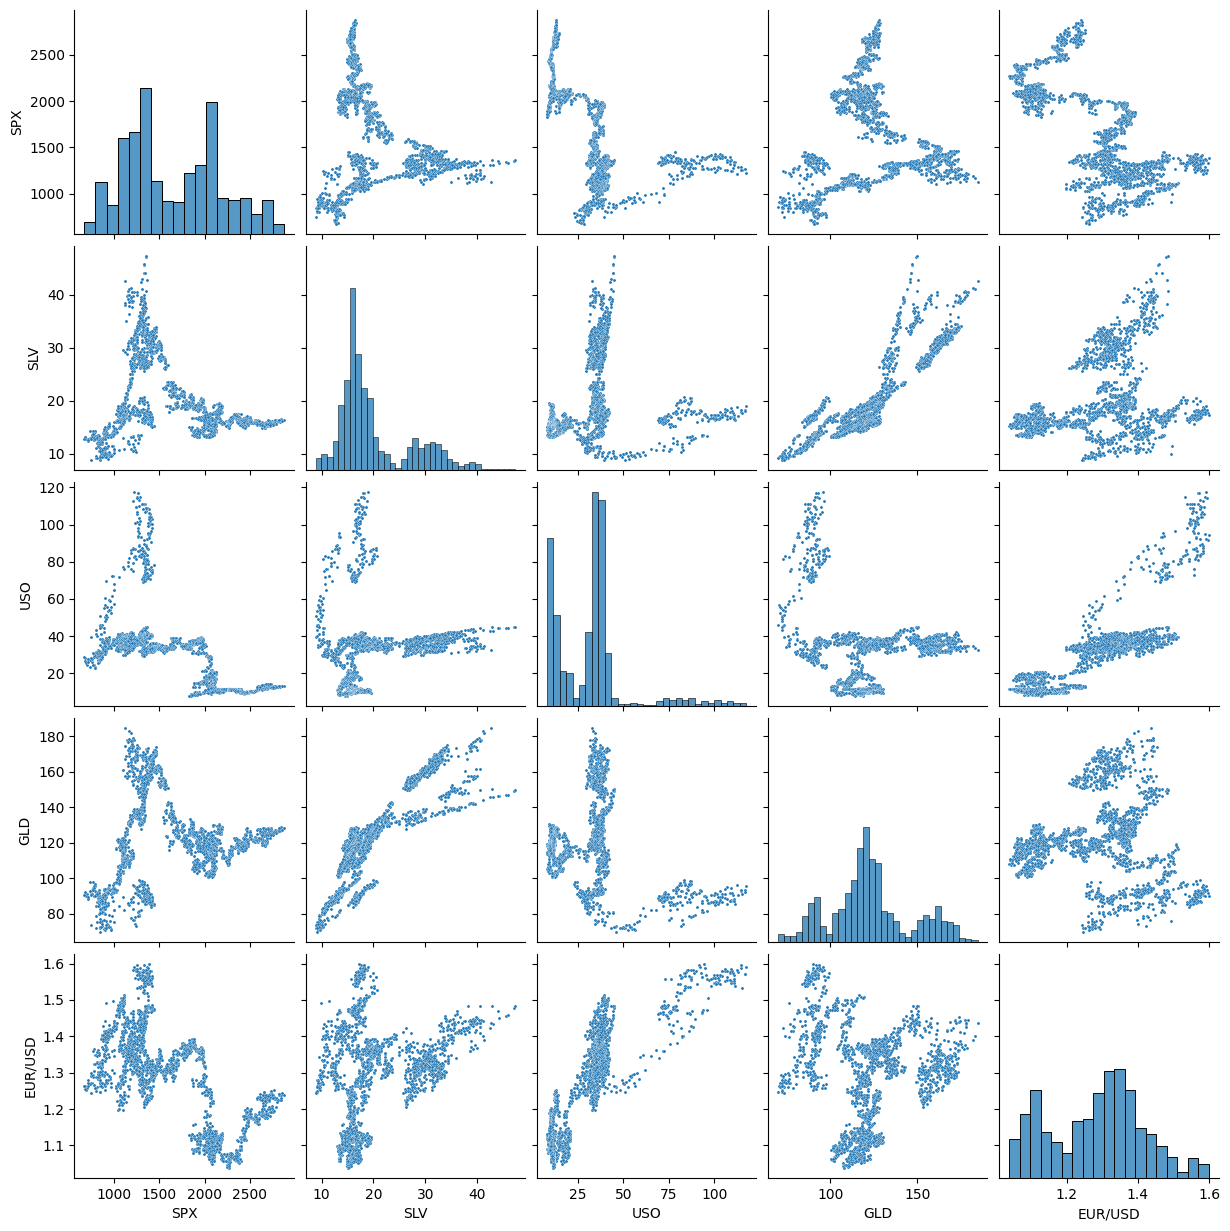

In [8]:
# Visualisasi dengan pairplot
sns.pairplot(gold_data[['SPX','SLV','USO', 'GLD', 'EUR/USD']], plot_kws={"s": 5})

In [9]:
# Menampilkan missing value
gold_data.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
# Menampilkan duplicated data
gold_data.duplicated().sum()

0

In [11]:
# Hitung Q1 dan Q3
Q1 = gold_data['GLD'].quantile(0.25)
Q3 = gold_data['GLD'].quantile(0.75)

# Hitung IQR
iqr = Q3 - Q1

# Hitung batas atas dan bawah outlier
lower_bound = Q1 - 1.5 * iqr
upper_bound = Q3 + 1.5 * iqr

# Cari outlier
outliers1 = gold_data[gold_data['GLD'] < lower_bound]
outliers2 = gold_data[gold_data['GLD'] > upper_bound]

# Cetak outlier
print(outliers1)
print(outliers2)

           Date          SPX        GLD        USO    SLV   EUR/USD
137   9/10/2008  1232.040039  74.220001  82.970001  10.60  1.399600
138   9/11/2008  1249.050049  73.080002  81.489998  10.32  1.423994
161  10/22/2008   896.780029  71.709999  54.930000   9.45  1.294498
162  10/23/2008   908.109985  70.650002  56.599998   9.38  1.262993
163  10/27/2008   848.919983  72.180000  50.849998   8.85  1.246463
164  10/28/2008   940.510010  73.790001  53.220001   9.05  1.280902
165  10/29/2008   930.090027  74.000000  55.680000   9.67  1.295924
166  10/30/2008   954.090027  72.709999  54.000000   9.68  1.286803
167  10/31/2008   968.750000  71.339996  55.590000   9.58  1.270196
168   11/3/2008   966.299988  71.099998  52.490002   9.62  1.261798
170   11/5/2008   952.770020  72.800003  53.840000  10.21  1.291806
171   11/6/2008   904.880005  72.220001  50.150002   9.90  1.269503
172   11/7/2008   930.989990  72.500000  50.040001   9.94  1.271407
173  11/10/2008   919.210022  73.580002  51.2300

In [12]:
# Membersihkan Outlier
gold_data.loc[gold_data['GLD'] < lower_bound, 'GLD'] = gold_data['GLD'].median()
gold_data.loc[gold_data['GLD'] > upper_bound, 'GLD'] = gold_data['GLD'].median()

print(gold_data)

           Date          SPX         GLD        USO      SLV   EUR/USD
0      1/2/2008  1447.160034   84.860001  78.470001  15.1800  1.471692
1      1/3/2008  1447.160034   85.570000  78.370003  15.2850  1.474491
2      1/4/2008  1411.630005   85.129997  77.309998  15.1670  1.475492
3      1/7/2008  1416.180054   84.769997  75.500000  15.0530  1.468299
4      1/8/2008  1390.189941   86.779999  76.059998  15.5900  1.557099
...         ...          ...         ...        ...      ...       ...
2285   5/8/2018  2671.919922  124.589996  14.060000  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.370000  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.410000  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.380000  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.405800  15.4542  1.182033

[2290 rows x 6 columns]


In [13]:
# Memisahkan Fitur dan Target
X = gold_data.drop(['Date','GLD'],axis=1)
y = gold_data['GLD']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

In [15]:
# Normalisasi data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Cek data normalisasi
print(X_train_scaled[:5])
print(X_test_scaled[:5])

[[0.21220486 0.29063185 0.21741478 0.5804562 ]
 [0.70115292 0.02437911 0.18793942 0.0446866 ]
 [0.01115755 0.15084003 0.10600324 0.39104325]
 [0.90926503 0.03588386 0.18171984 0.33504243]
 [0.53392282 0.22899927 0.28583016 0.59000016]]
[[0.28579877 0.27752211 0.62604175 0.50471252]
 [0.24802538 0.789028   0.11953126 0.77180117]
 [0.53378663 0.00671944 0.14270834 0.1343317 ]
 [0.6752491  0.0255891  0.25416671 0.14725159]
 [0.75585331 0.02301178 0.22031251 0.03896214]]


In [16]:
lin_reg = LinearRegression()

In [17]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [18]:
param_grid = {'copy_X': [True, False],
              'fit_intercept': [True, False],
              'n_jobs': [None],
              'positive': [True, False]}

In [19]:
grid_search = GridSearchCV(lin_reg,
                           param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error')

In [20]:
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [None],
                         'positive': [True, False]},
             scoring='neg_mean_squared_error')

In [21]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Parameter terbaik untuk model Linear Regression adalah: {best_params}')
print(f'Skor Mean Squared Error (MSE) terbaik untuk model Regresi Linear adalah: {best_score}')

Parameter terbaik untuk model Linear Regression adalah: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': True}
Skor Mean Squared Error (MSE) terbaik untuk model Regresi Linear adalah: -312.7666775104901


In [22]:
svr = SVR()

In [23]:
svr.fit(X_train, y_train)

SVR()

In [24]:
param_grid = {'C': [1.0, 2.0],
              'cache_size': [100, 200],
              'coef0': [0.0, 0.1],
              'degree': [1, 3],
              'epsilon': [0.1, 0,2],
              'gamma': ['scale'],
              'kernel': ['rbf'],
              'max_iter': [-1],
              'shrinking': [True],
              'tol': [0.001, 0.01],
              'verbose': [False]}


In [25]:
grid_search = GridSearchCV(svr,
                           param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error')

In [26]:
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1.0, 2.0], 'cache_size': [100, 200],
                         'coef0': [0.0, 0.1], 'degree': [1, 3],
                         'epsilon': [0.1, 0, 2], 'gamma': ['scale'],
                         'kernel': ['rbf'], 'max_iter': [-1],
                         'shrinking': [True], 'tol': [0.001, 0.01],
                         'verbose': [False]},
             scoring='neg_mean_squared_error')

In [27]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Parameter terbaik untuk model SVM Regressor adalah: {best_params}')
print(f'Skor Mean Squared Error (MSE) terbaik untuk model SVM Regressor adalah: {best_score}')

Parameter terbaik untuk model SVM Regressor adalah: {'C': 1.0, 'cache_size': 100, 'coef0': 0.0, 'degree': 1, 'epsilon': 0, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.01, 'verbose': False}
Skor Mean Squared Error (MSE) terbaik untuk model SVM Regressor adalah: -932.6048239718108


In [28]:
metrics = pd.DataFrame(index=['Linear Regression','SVM Regressor'])

model_dict = {'Linear Regression': lin_reg, 'SVM Regressor': svr}

for name, model in model_dict.items():
    # Hitung MAE
    mae_train = mean_absolute_error(y_true=y_train, y_pred=model.predict(X_train))
    mae_test = mean_absolute_error(y_true=y_test, y_pred=model.predict(X_test))

    # Hitung MSE
    mse_train = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))
    mse_test = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))

    # Hitung R2
    r2_train = r2_score(y_true=y_train, y_pred=model.predict(X_train))
    r2_test = r2_score(y_true=y_test, y_pred=model.predict(X_test))

    # Simpan hasilnya dalam DataFrame
    metrics.loc[name, 'MAE Train'] = round(mae_train, 3)
    metrics.loc[name, 'MAE Test'] = round(mae_test, 3)
    metrics.loc[name, 'MSE Train'] = round(mse_train, 3)
    metrics.loc[name, 'MSE Test'] = round(mse_test, 3)
    metrics.loc[name, 'R2 Train'] = round(r2_train, 3)
    metrics.loc[name, 'R2 Test'] = round(r2_test, 3)

# Panggil DataFrame yang berisi MAE, MSE dan R2
display(metrics)


,MAE Train,MAE Test,MSE Train,MSE Test,R2 Train,R2 Test
Linear Regression,8.343,8.018,132.806,126.818,0.683,0.691
SVM Regressor,14.057,14.128,370.107,369.564,0.116,0.099


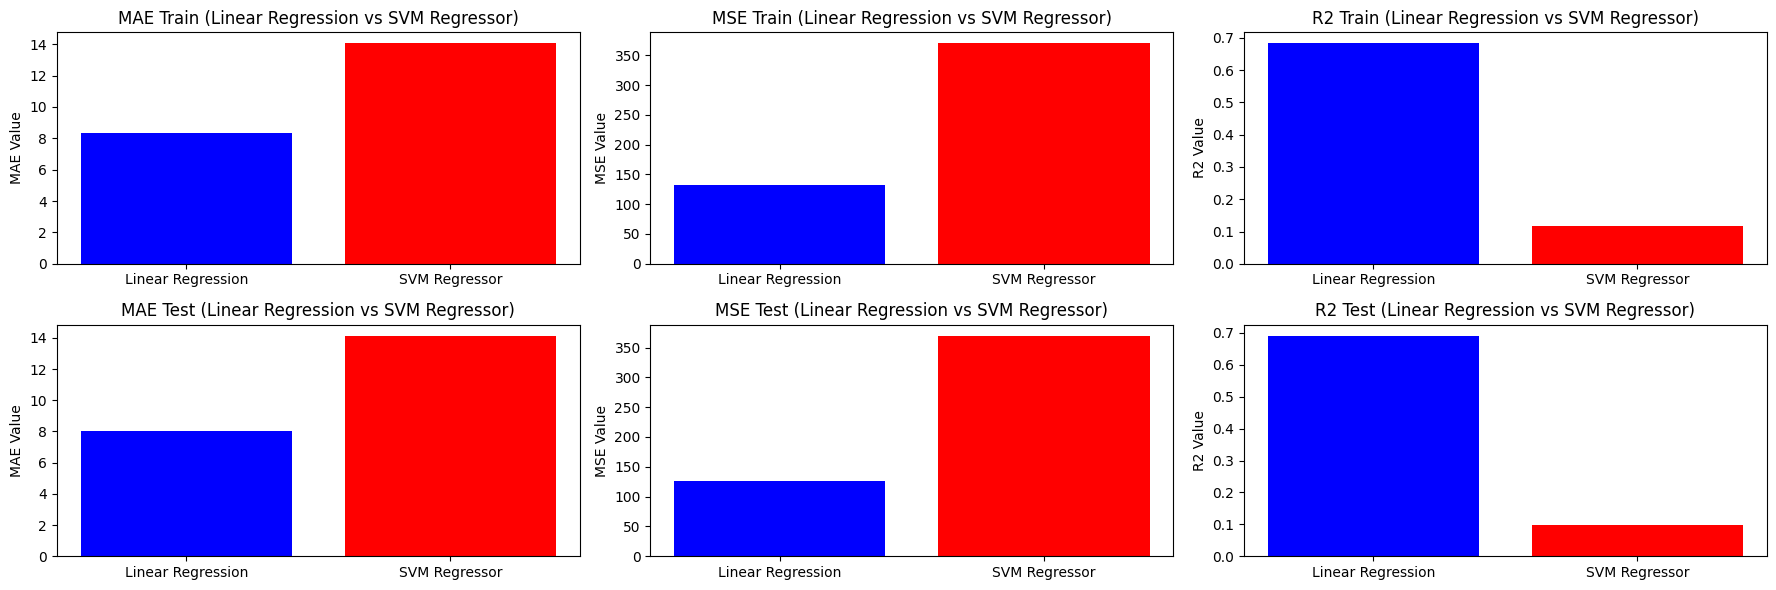

In [29]:
# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(18, 6))
colors = {'Linear Regression': 'blue', 'SVM Regressor': 'red'}

# Plot MAE Linear Regression vs MAE SVM Regressor
axes[0,0].bar(metrics.index, metrics['MAE Train'].values, color=[colors['Linear Regression'], colors['SVM Regressor']])
axes[0,0].set_ylabel('MAE Value')
axes[0,0].set_title('MAE Train (Linear Regression vs SVM Regressor)')

# Plot MSE Linear Regression vs MSE SVM Regressor
axes[0,1].bar(metrics.index, metrics['MSE Train'].values, color=[colors['Linear Regression'], colors['SVM Regressor']])
axes[0,1].set_ylabel('MSE Value')
axes[0,1].set_title('MSE Train (Linear Regression vs SVM Regressor)')

# Plot R2 Linear Regression vs R2 SVM Regressor
axes[0,2].bar(metrics.index, metrics['R2 Train'].values, color=[colors['Linear Regression'], colors['SVM Regressor']])
axes[0,2].set_ylabel('R2 Value')
axes[0,2].set_title('R2 Train (Linear Regression vs SVM Regressor)')

# Plot MAE Linear Regression vs MAE SVM Regressor
axes[1,0].bar(metrics.index, metrics['MAE Test'].values, color=[colors['Linear Regression'], colors['SVM Regressor']])
axes[1,0].set_ylabel('MAE Value')
axes[1,0].set_title('MAE Test (Linear Regression vs SVM Regressor)')

# Plot MSE Linear Regression vs MSE SVM Regressor
axes[1,1].bar(metrics.index, metrics['MSE Test'].values, color=[colors['Linear Regression'], colors['SVM Regressor']])
axes[1,1].set_ylabel('MSE Value')
axes[1,1].set_title('MSE Test (Linear Regression vs SVM Regressor)')

# Plot R2 Linear Regression vs R2 SVM Regressor
axes[1,2].bar(metrics.index, metrics['R2 Test'].values, color=[colors['Linear Regression'], colors['SVM Regressor']])
axes[1,2].set_ylabel('R2 Value')
axes[1,2].set_title('R2 Test (Linear Regression vs SVM Regressor)')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [30]:
pred = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict[name] = model.predict(pred).round(3)

pd.DataFrame(pred_dict)

,y_true,Linear Regression,SVM Regressor
903,120.580002,148.668,120.689
